## DataProc Introduction
*Google Cloud Dataproc is a **fully managed, highly scalable service** for running Apache Spark, Hadoop, and other open-source data processing frameworks on Google Cloud. It's designed to simplify the complex task of setting up, managing, and scaling big data environments, allowing you to focus on analyzing your data rather than managing infrastructure.*

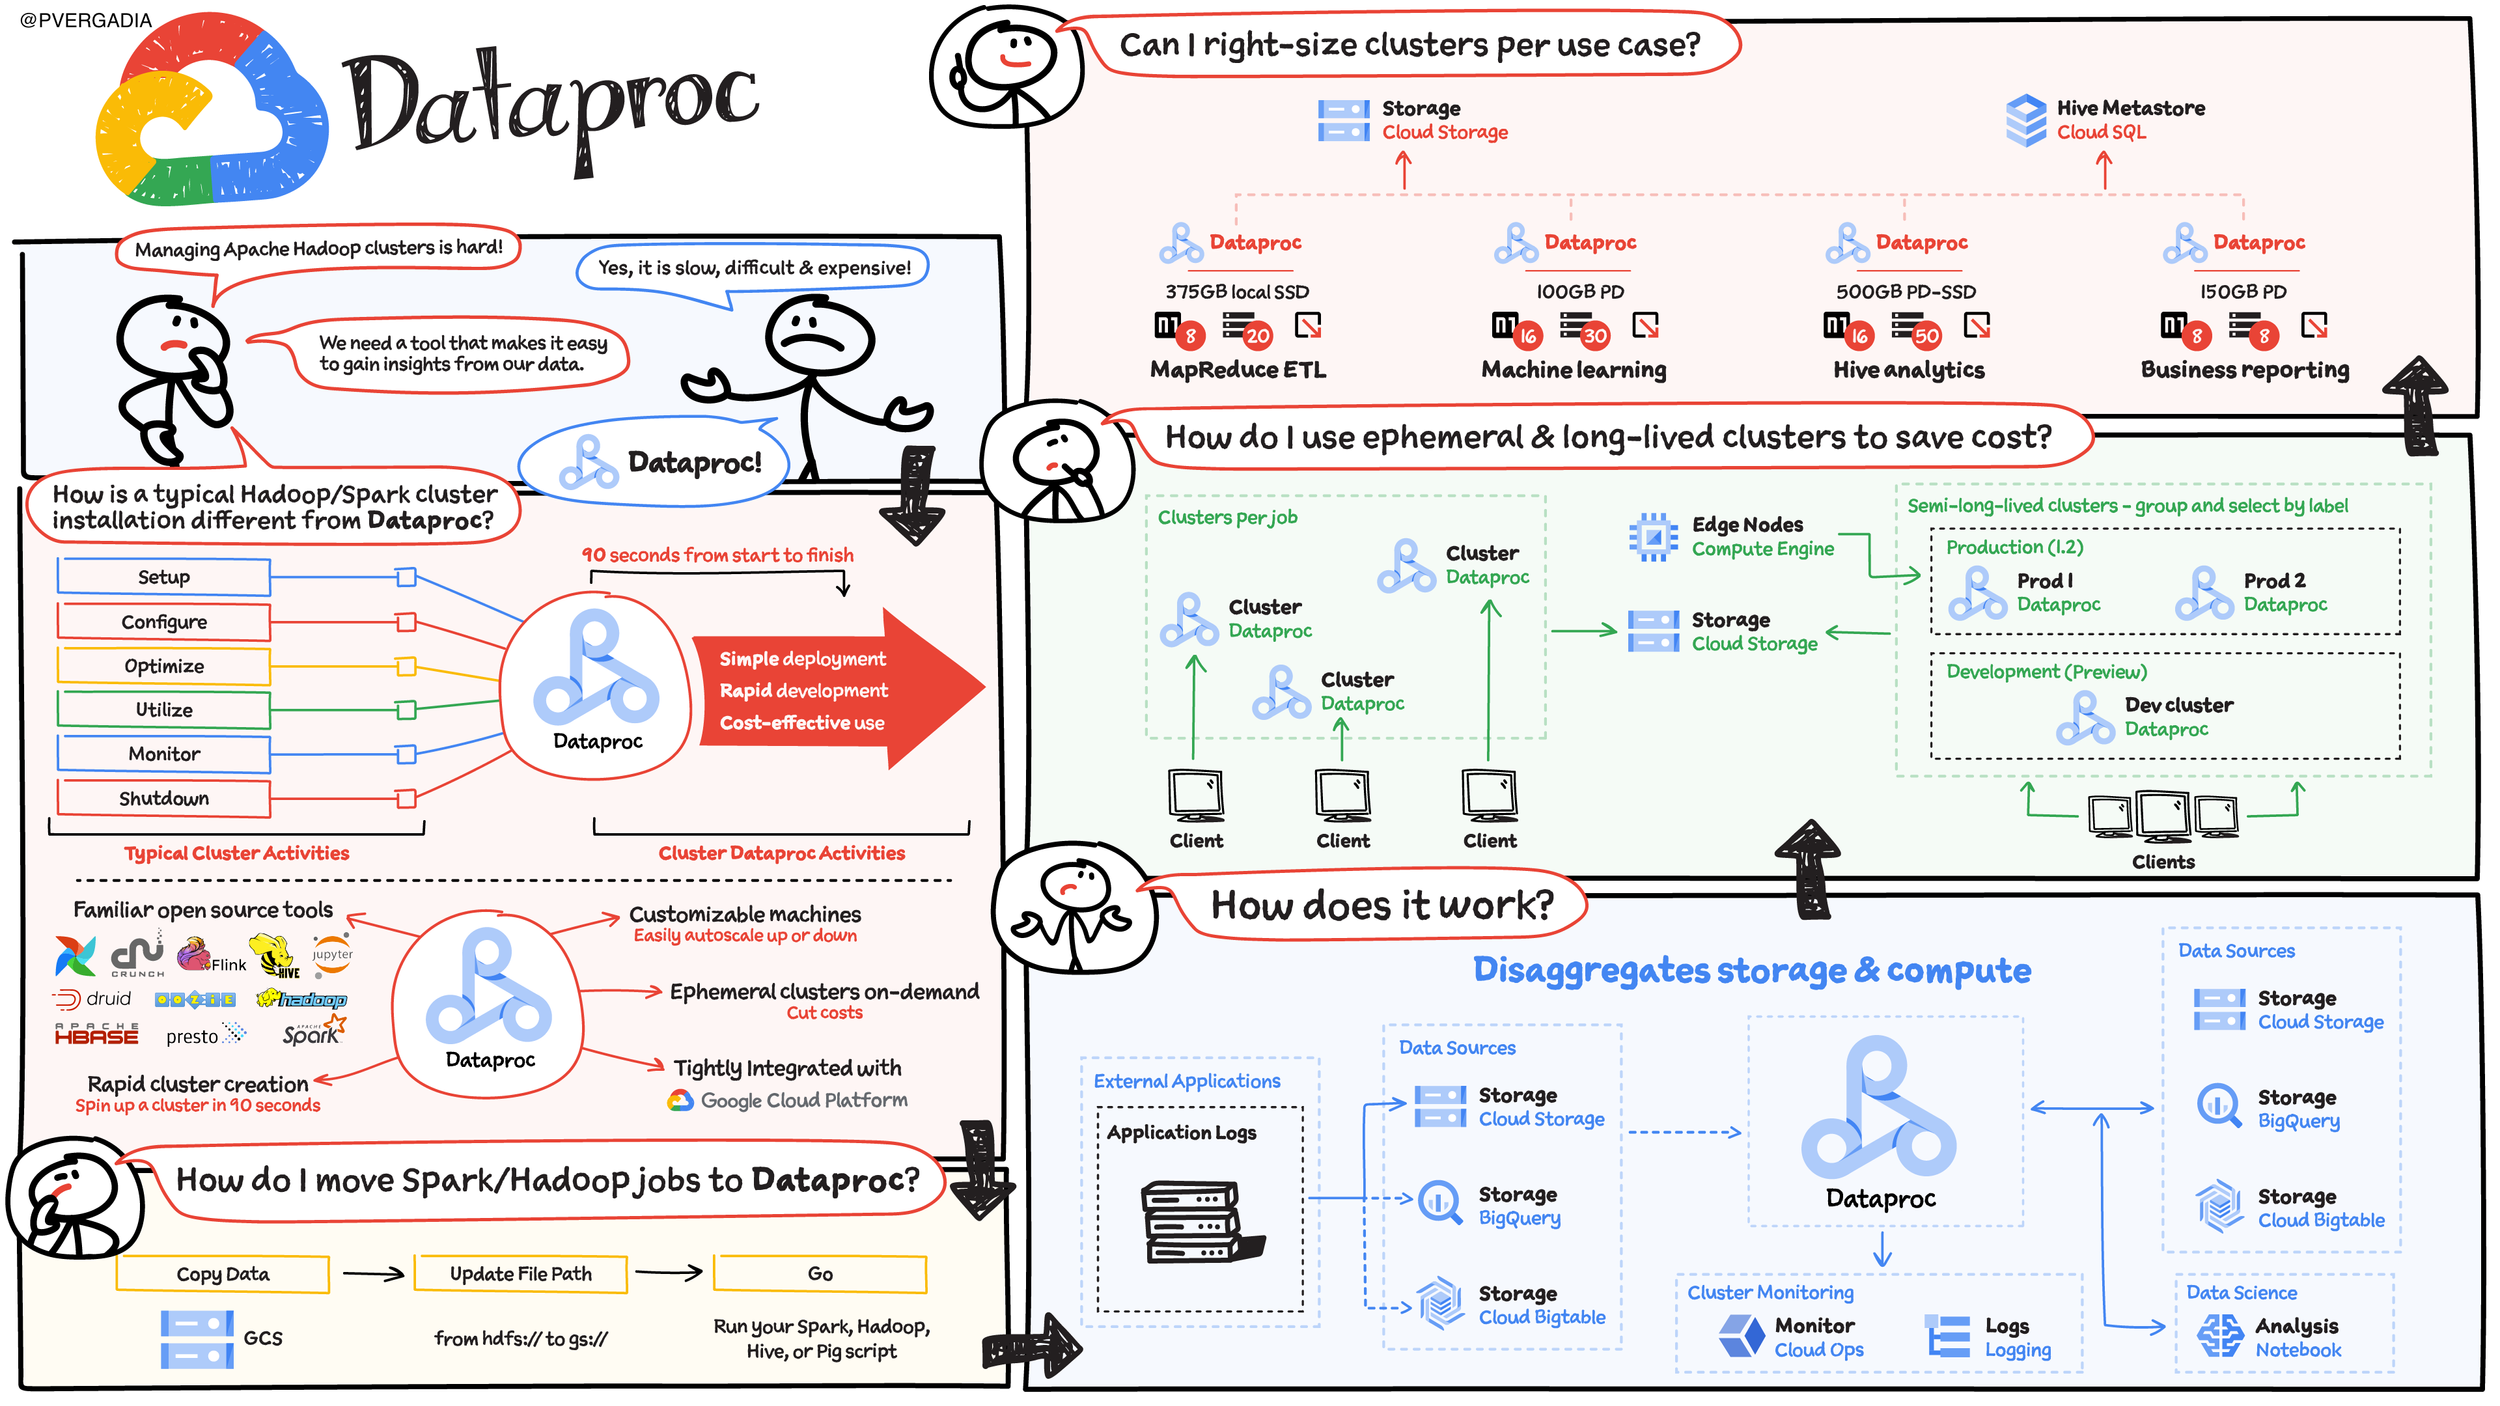
**Notice:** if you find this emoji 🧑‍🎓 it means that you will see more on this in this training


### Concepts and Features:

- **Managed Service**: Dataproc handles the heavy lifting of provisioning, configuring, monitoring, and maintaining your Spark and Hadoop clusters. This includes managing virtual machines (VMs), operating systems, and the various open-source components. In a traditional Hadoop deployment, even one that is cloud-based, you must install, configure, administer, and orchestrate work on the cluster. 
- **Open-Source Compatibility**: It fully supports the Apache Spark and Hadoop ecosystem, along with other popular tools like Flink, Trino (Presto), Hive, and over 30 other open-source frameworks. This means you can migrate existing on-premises Spark/Hadoop workloads to GCP with minimal to no code changes.
- **Fast Cluster Creation and Scaling**: Dataproc clusters can be created, scaled up, and scaled down very quickly (often in 90 seconds or less). This agility is crucial for handling fluctuating workloads and optimizing costs.
- **Cost-Effective**: You're charged only for the compute resources you use, with second-by-second billing and a low one-minute minimum. Dataproc also supports using preemptible VMs, which can significantly reduce costs for fault-tolerant workloads.

### Key Features
#### General
- **Multiple way of interaction:**
  - use browser-based Google Cloud console to interact with Dataproc. 
  - [🧑‍🎓] use the Google Cloud CLI 
  - use the Dataproc REST API. 
  - make SSH connections to master or worker nodes in your cluster.
- **Spark on YARN** YARN manages the resources for Spark: When you submit a Spark job to a Dataproc cluster, YARN is responsible for:
    - Allocating containers: YARN reserves "containers" (isolated execution environments with specific CPU and memory) on the cluster's nodes for your Spark application.
    - Launching Spark components: It launches the Spark driver (the main program that coordinates the Spark application) and Spark executors (worker processes that perform the actual computations on data partitions) within these allocated containers.
    - Monitoring and managing: YARN continuously monitors the resources consumed by Spark and ensures that the application runs efficiently and recovers from failures. https://spark.apache.org/docs/latest/running-on-yarn.html 
- **Dataproc billed.** Dataproc is billed by the second, and is based on the size of a cluster and the length of time the cluster is operational. In computing the cluster component of the fee, Dataproc charges a flat fee based on the number of virtual CPUs (vCPUs) in a cluster. This flat fee is the same regardless of the machine type or size of the Compute Engine resources used.
- **Billing for other Google Cloud resources** Running a Dataproc cluster incurs charges for other Google Cloud resources used in the cluster, such as Compute Engine and Cloud Storage. Each item is stated separately in your bill, so you know exactly how your costs are calculated and allocated.
- **Logging and monitoring** By default, Dataproc clusters are integrated with Monitoring and Logging. Monitoring and Logging make it easy to get detailed information about the health, performance, and status of your Dataproc clusters. Both application (YARN, Spark, etc.) and system logs are forwarded to Logging.

#### Cluster management
  - **run more than one Dataproc cluster per project simultaneously.** By default, all projects are subject to Google Cloud resource quotas, defining the number of resources that your project has access to. You can easily check your quota usage and request an increase to your quota. Check for dataproc quotas: https://cloud.google.com/dataproc/quotas  
  - [🧑‍🎓] **initialization actions** Dataproc supports initialization actions that are executed when a cluster is created. These initialization actions can be scripts or executables that Dataproc will run when provisioning your cluster to customize settings, install applications, or make other modifications to your cluster. Notice Google offers some initialization actions scripts, but you can create also your own.
  - [🧑‍🎓] **resize your cluster**, even during job processing.  Resizing clusters is acceptable and supported except in special cases, such as reducing the number of workers to one or reducing HDFS capacity below the amount needed for job completion.
  - [🧑‍🎓] **Persistent cluster** Dataproc clusters continue to run until shut down. You can run a Dataproc cluster for as long as you need. WARNING this means that you will pay for it up to the point you will shut it down.
#### Job and workflow management
- **run more than one job at a time on a Dataproc cluster**. Cloud Dataproc utilizes a resource manager (YARN) and application-specific configurations, such as scaling with Spark, to optimize the use of resources on a cluster. Job performance will scale with cluster size and the number of active jobs.
- **automate jobs**. Jobs can be automated to run on clusters through several mechanisms. You can use the gcloud CLI Google Cloud CLI or the Dataproc REST APIs to automate the management and workflow of clusters and jobs.

#### Development
- **development languages**. languages supported by the Spark/Hadoop ecosystem, including Java, Scala, Python, and R. 
-  **default replication factor** Due to performance considerations as well as the high reliability of storage attached to Dataproc clusters, the default replication factor is set at 2.
- **based on Debian and Ubuntu**. The latest images are based on Debian 10 Buster and Ubuntu 18.04 LTS.
-  **Workflow Templates** Orchestrate complex data processing jobs with predefined templates, simplifying the execution and management of recurring workloads.
- **Different deployment models** Dataproc offers 
  - [🧑‍🎓] **Dataproc on Compute Engine:** This is the traditional model where you manage YARN-based clusters on Compute Engine VMs. (This is what the initial question primarily referred to).
  - [🧑‍🎓] **Dataproc Serverless:** For PySpark batch workloads, this option allows you to run jobs without provisioning or managing any cluster infrastructure. Dataproc automatically handles the underlying compute resources.
  -  **Dataproc on Google Kubernetes Engine (GKE):** Allows you to deploy Spark workloads on your existing GKE clusters, leveraging Kubernetes for container orchestration.

#### Data Availability & Storage
- **get data in and out of a cluster** Dataproc utilizes the Hadoop Distributed File System (HDFS) for storage. Additionally, Dataproc automatically installs the HDFS-compatible Google Cloud Storage connector, which enables the use of Cloud Storage in parallel with HDFS. Data can be moved in and out of a cluster through upload/download to HDFS or Cloud Storage. Notice:  Dataproc clusters automatically install the Cloud Storage connector. There are a number of benefits to choosing Cloud Storage over traditional HDFS including data persistence, reliability, and performance.
- **when a cluster is shut down** Any data in Cloud Storage persists after your cluster is shut down. This is one of the reasons to choose Cloud Storage over HDFS since HDFS data is removed when a cluster is shut down (unless it is transferred to a persistent location prior to shutdown).



## Google Cloud Dataproc core components:

### 1. Underlying Google Cloud Infrastructure

Dataproc builds upon fundamental Google Cloud services:

* **Compute Engine Virtual Machines (VMs):** These are the virtual servers that make up your Dataproc cluster. Each node in your cluster (master and worker) is a Compute Engine VM. You configure their machine types (CPU, memory), disk sizes, and even use preemptible VMs for cost optimization.
* **Cloud Storage (GCS):** This is the primary storage layer for your data in Dataproc. Unlike traditional Hadoop setups where HDFS (Hadoop Distributed File System) is tightly coupled with compute nodes, Dataproc *disaggregates* compute and storage. Your data resides in highly scalable and durable Cloud Storage buckets, and Spark/Hadoop jobs access it directly from there. This allows for elastic scaling of compute independent of storage.
* **Cloud Monitoring and Cloud Logging:** Dataproc clusters are deeply integrated with these services for monitoring performance, health, and collecting logs from all cluster components (Spark, YARN, Hadoop, etc.). This provides visibility and aids in troubleshooting.
* **Identity and Access Management (IAM):** IAM is used to control who can create, manage, and interact with your Dataproc clusters and the data they process. Dataproc uses service accounts (Dataproc VM service account, Dataproc Service Agent service account) for internal operations and interacting with other Google Cloud services.
* **Virtual Private Cloud (VPC) Network:** Dataproc clusters are deployed within your specified VPC network, allowing you to control network access, firewall rules, and connectivity to other Google Cloud services or on-premises environments.

### 2. Dataproc Cluster Components (Open Source Software)

These are the open-source big data frameworks that Dataproc manages and deploys on your Compute Engine VMs:

* **Apache Hadoop YARN (Yet Another Resource Negotiator):** As discussed, YARN is the resource manager. It's responsible for allocating resources (CPU, memory) to applications running on the cluster and managing their lifecycle. It runs on both master and worker nodes.
* **Apache Spark:** The distributed processing engine for large-scale data analytics. It runs on top of YARN for resource management. Spark applications consist of a driver and executors.
* **Hadoop Distributed File System (HDFS) (Optional/Limited Use):** While Cloud Storage is the primary storage, Dataproc clusters do have a local HDFS instance running on the Compute Engine disks. This is primarily used for temporary shuffle data, Spark's scratch space, and internal metadata. It's not typically used for persistent user data.
* **Other Core Hadoop Components:**
    * **MapReduce:** The original distributed processing framework in Hadoop, still supported by Dataproc.
    * **Apache Hive:** A data warehousing solution that provides a SQL-like interface for querying data stored in HDFS or Cloud Storage.
    * **Apache Pig:** A high-level platform for creating MapReduce programs.

### 3. Dataproc Specific Features and Management Layers

Beyond the open-source components and underlying infrastructure, Dataproc provides its own management and automation layers:

* **Dataproc Control Plane (Managed Service):** This is the Google-managed part of Dataproc that handles:
    * **Cluster Provisioning:** Automates the creation of Compute Engine VMs, installation of software, and configuration of the cluster.
    * **Cluster Management:** Provides APIs and a UI for starting, stopping, resizing, and deleting clusters.
    * **Job Submission:** Allows you to submit Spark, Hadoop, Hive, Pig, and other jobs to your cluster.
    * **Monitoring and Health Checks:** Continuously monitors the cluster's health and the status of the open-source components.
* **Image Versions:** Dataproc provides various image versions, which are pre-built combinations of operating systems, Hadoop, Spark, and other components. These images ensure compatibility and simplify deployment.
* **Initialization Actions:** As detailed previously, these are custom scripts executed on cluster nodes during creation to install additional software or configure the environment.
* [🧑‍🎓] **Optional Components:** Dataproc allows you to easily enable additional popular big data components like Flink, Presto/Trino, ***Jupyter***, Zeppelin, HBase, Solr, Ranger, Iceberg, Hudi, and Delta Lake with a simple flag during cluster creation. These are often pre-tested for compatibility.
* **Workflow Templates:** A declarative way to define and manage sequences of Dataproc jobs, including cluster creation, job execution, and cluster deletion. This is excellent for reproducible pipelines.
* **Component Gateway (Apache Knox):** Provides secure HTTP access to the web UIs of various cluster components (e.g., YARN UI, Spark UI) without requiring direct SSH tunneling. It acts as a proxy with integrated authentication.
* **Autoscaling:** Dataproc supports automatic scaling of worker nodes (primary and secondary) based on cluster utilization, allowing you to optimize costs and performance.
* **Dataproc Metastore (Optional):** A fully managed Hive Metastore service that externalizes the metadata for your Hive tables, making it persistent even if your Dataproc cluster is deleted. This is crucial for long-lived data lakes.




## Compare Dataproc

### 1. Dataproc on Compute Engine: The Cluster-Based Architecture

The traditional Dataproc model provides a fully-managed, cluster-based environment for running Spark and other open-source data processing frameworks. From a PySpark developer's perspective, this architecture directly maps to the core components of a Spark application's distributed execution.

* **Master Node:** This node serves as the central point of control and coordination for both the cluster and your PySpark application.
    * **Cluster Management:** It runs the Hadoop YARN ResourceManager, which is responsible for allocating resources across all applications in the cluster.
    * **PySpark Application Driver:** When you submit a PySpark job, the **Spark Driver** process is typically instantiated on the master node. The driver is the heart of your application; it maintains the SparkSession, translates your Python code into a logical and physical execution plan (a DAG of tasks), and schedules these tasks for execution on the worker nodes.

* **Worker Nodes:** These nodes provide the distributed compute and storage capacity.
    * **Task Execution:** Each worker node runs a YARN NodeManager daemon, which manages the resources on that machine. When the Spark Driver schedules tasks, YARN allocates containers on these worker nodes.
    * **PySpark Executors:** Within these containers, **Spark Executor** processes are launched. The executors are responsible for the actual execution of your PySpark code—they run the tasks on data partitions and report the results back to the driver. The collective power of these executors allows for massive parallel processing.

**In essence, when using this model, you are responsible for provisioning a cluster with sufficient master and worker resources to host your Spark Driver and concurrently run all the necessary Spark Executors for your PySpark jobs.**

---

### 2. Dataproc Serverless: The Managed Execution Environment

Dataproc Serverless represents a paradigm shift from infrastructure management to a pure job submission model. It abstracts the entire cluster architecture, allowing developers to focus solely on their PySpark code.

* **The Concept:** With Dataproc Serverless, you do not provision or interact with master or worker nodes. Instead, you submit a **batch workload** directly to the Dataproc service. Google Cloud transparently manages the provisioning, configuration, and scaling of the underlying infrastructure required to run the Spark Driver and Executors for your job.

* **Execution Model for PySpark:**
    1.  **Job Submission:** You submit your PySpark script (`.py`), along with its dependencies (e.g., zipped packages, JAR files) and Spark properties, as a "batch" request.
    2.  **Automated Resource Provisioning:** Dataproc Serverless analyzes your job and provisions a managed compute environment. It instantiates the necessary resources to run both the Spark Driver and an appropriate number of Spark Executors.
    3.  **Dynamic Scaling:** The service leverages Spark's dynamic allocation capabilities to automatically scale the number of executors up or down throughout your job's lifetime based on workload demands.
    4.  **Ephemeral Lifecycle:** Once your PySpark application completes (either on success or failure), all underlying compute resources are immediately and automatically de-provisioned.

**From a professional PySpark developer's standpoint, Dataproc Serverless is a NoOps execution environment. It's ideal for batch ETL/ELT pipelines, data science workloads, and other non-interactive tasks where the primary goal is to execute a script without the overhead of cluster tuning, management, and lifecycle control. Dependency management is handled by packaging your Python environment or using custom container images.**


### The Serverless Lifecycle

1.  **Submission:** You submit a *batch workload* (e.g., using `gcloud dataproc batches submit ...`). You are not creating a cluster; you are just handing your job to the Dataproc service.

2.  **Automatic Provisioning:** In the background, Google Cloud automatically provisions all the necessary compute resources (VMs, memory, networking) required to run your specific job. This infrastructure is temporary and dedicated solely to your batch workload.

3.  **Execution:** Your Spark job runs on this ephemeral, managed infrastructure. The service will even autoscale these resources up or down depending on your job's needs.

4.  **Automatic Deletion (The "When" and "How"):**

      * **When:** The moment your batch job finishes. This happens whether the job `SUCCEEDS` or `FAILS`.
      * **How:** Google Cloud automatically and immediately begins to tear down and release all the compute resources that were provisioned for your job. The process is entirely managed by the service.

### Key Contrast with Standard Dataproc

To understand the benefit, it's helpful to compare it to the standard Dataproc model:

| Feature | Standard Dataproc (Cluster-based) | Dataproc Serverless |
| :--- | :--- | :--- |
| **Your Action** | 1. `gcloud dataproc clusters create`  2. `gcloud dataproc jobs submit` | `gcloud dataproc batches submit` |
| **Resource Lifecycle** | Persistent. The cluster runs **indefinitely** after jobs finish. | Ephemeral. Resources exist **only** for the duration of the batch job. |
| **Deletion** | **Your responsibility.** You must manually run `gcloud dataproc clusters delete` or configure auto-deletion (`--max-age` / `--max-idle`). | **Automatic and built-in.** Google handles it the moment your job terminates. You do nothing. |
| **Cost Model** | Billed for the entire time the cluster is running, even when idle. | Billed only for the resources consumed while the job is actively running. |

In summary, the "deletion" in Dataproc Serverless is not an action you perform. It is an intrinsic, automatic feature of the service that ensures you only pay for the exact resources needed to run your workload, making it extremely efficient and cost-effective.